# Linear regression

We recall one of the most basic models in machine learning: linear regression. We apply it to the problem of predicting the price of a house.

We use the dataset available on [Kaggle](https://www.kaggle.com/datasets/kirbysasuke/house-price-prediction-simplified-for-regression). Its format is a CSV file. We load it as a `DataFrame` using the `pandas` library.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../datasets/Real_Estate.csv')

In [4]:
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


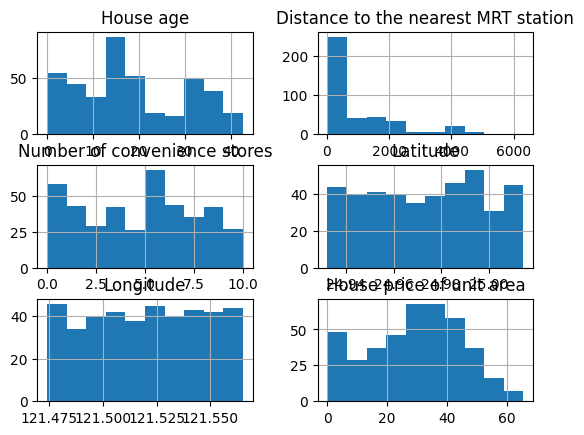

In [6]:
_ = data.hist()

We have a dataset with 414 observations and 7 columns. We will do a simple linear regression using the following features:
- `House age` -> $X_0$
- `Distance to the nearest MRT station` -> $X_1$
- `Number of convenience stores` -> $X_2$
- `Latitude` -> $X_3$
- `Longitude` -> $X_4$
  
trying to predict the
- `House price of unit area` -> $Y$

We want to predict the `House price of unit area` based on the other features with a linear model, _i.e._, a prediction based on the ansatz
$$
Y \approx w_0 X_0 + w_1 X_1 + w_2 X_2 + w_3 X_3 + w_4 X_4 + b. 
$$
The objective is to find "good" values for the weights $w_0, w_1, w_2, w_3, w_4$ and the bias $b$, exploiting the available data.

We recall how linear regression works. We have some observed realizations of the features $X_0, X_1, \dots, X_{M-1}$ (here $M=5$) and the target $Y$, _i.e._, we have a dataset $\{(x_{i}, y_{i})\}_{i=0, \ldots, N-1}$ (here $N=332$) where $x_i = (x_{i0}, x_{i1}, \dots, x_{i,M-1}) \in \mathbb{R}^{1\times M}$ and $y_i \in \mathbb{R}$ are the features and the target of the $i$-th observation, respectively. We can think of the features as input data and they can be summarized in a matrix $x \in \mathbb{R}^{N\times M}$ and the target as a vector $y \in \mathbb{R}^{N\times 1}$. 

The linear regression model can be written compactly as
$$
f(X;w,b) = Xw + b,
$$
where $X = (X_0, X_1, \dots, X_{M-1}) \in \mathbb{R}^{1 \times M}$ is the random feature vector, $w \in \mathbb{R}^{M\times 1}$ is the weights vector, and $b \in \mathbb{R}$ is the bias. The objective is to find the weights $w$ and the bias $b$ that minimize the mean squared error (MSE) between the predictions and the real target, _i.e._, 
$$
\min_{\substack{w \in \mathbb{R}^{M \times 1} \\ \ b \in \mathbb{R}}} L(w,b;\{(x_i,y_i)\}_{i=0,\dots,N-1})\, , \  \quad \text{where } L(w,b;\{(x_i,y_i)\}_{i=0,\dots,N-1}) = \frac{1}{N} \sum_{i=0}^{N-1} (x_i w + b - y_i)^2.
$$